<a href="https://colab.research.google.com/github/sbc806/scrna_mvae/blob/master/mvae_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=7ae37df3008ecc66c2eacfd77e74f55bebb00f48e27923d285d6cbf3589ff65b
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=b23b7407bee3bb43f1608cf82a1646446c425a950c09d819b25e468bc7d9b6f2
  Stored in directory: /root/.cache/pip/wheels/6a/a

In [2]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.6 MB/s eta 0:00:00


In [3]:
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.6 MB/s eta 0:00:00


In [4]:
!pip install anndata

In [5]:
!pip install loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52018 sha256=7330f7054f3d759d136da4ddc0203bf5c4adc94755603fe69bded2ebffdb5d9e
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25846 sha256=0d866c1b802e88b083b7d04fdd4c7a5e6c1e5b684e7e7efbbad8d00685e793de
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
Successfully built loompy numpy-groupies


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import anndata

import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import scanpy as sc

# Analyze data below

In [ ]:
# dataset = "DataSetS2"

# if dataset == "hela":
  # adata = anndata.read_loom('/content/drive/MyDrive/mvae/data/scdata/hela_select.loom')
  # color = 'batch'
# elif dataset == "DataSetS2":
  # adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/DataSetS2.h5ad')
  # color = 'cycle'

In [10]:
dir_path = '/content/drive/MyDrive/'
save_path = '/content/drive/MyDrive/graduate_research/mvae_results'
figure_save_path = '/content/scrna_mvae/figures/'
dataset_name = "hela"
print("Dataset:", dataset_name)

if dataset_name == "hela":
  adata = anndata.read_loom('/content/drive/MyDrive/mvae/data/scdata/hela_select.loom')
  save_path = os.path.join(save_path, 'hela')
  figure_save_path = os.path.join(figure_save_path, 'hela')

elif dataset_name == "DataSetS2":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/DataSetS2.h5ad')
  adata.var['primerid'].index = np.arange(0, adata.n_vars, 1)
  save_path = os.path.join(save_path, 'DataSetS2')
  figure_save_path = os.path.join(figure_save_path, 'DataSetS2')

elif dataset_name == "velocity_human":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/velocity_human_fibroblast.h5ad')
  save_path = os.path.join(save_path, 'cell_cycle_gene_regulation/velocity_human')
  figure_save_path = os.path.join(figure_save_path, 'cell_cycle_gene_regulation/velocity_human')

elif dataset_name == "velocity_mouse":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/velocity_mouse.h5ad')
  save_path = os.path.join(save_path, 'cell_cycle_gene_regulation/velocity_mouse')
  figure_save_path = os.path.join(figure_save_path, 'cell_cycle_gene_regulation/velocity_mouse')

elif dataset_name == "melanoma":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/melanoma_single_cell_revised_v2.h5ad')
  save_path = os.path.join(save_path, 'cyclum_paper/melanoma')

elif dataset_name == "ovarian_epithelial":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/local.h5ad')
  save_path = os.path.join(save_path, 'ovarian/ovarian_epithelial')
  figure_save_path = os.path.join(figure_save_path, 'ovarian/ovarian_epithelial')

elif dataset_name == "myeloid":
  adata = sc.read_h5ad('/content/drive/MyDrive/immune_cell_dataset/myeloid/CountAdded_PIP_myeloid_object_for_cellxgene.h5ad')
  save_path = os.path.join(save_path, 'immune_cell_dataset/myeloid')

elif dataset_name == "b_cells":
  adata = sc.read_h5ad('/content/drive/MyDrive/immune_cell_dataset/b-cells/CountAdded_PIP_B_object_for_cellxgene.h5ad')
  save_path = os.path.join(save_path, 'immune_cell_dataset/b_cells')

elif dataset_name == 't_cells':
  adata = sc.read_h5ad('/content/drive/MyDrive/immune_cell_dataset/t_cells/CountAdded_PIP_T_object_for_cellxgene.h5ad')
  save_path = os.path.join(save_path, 'immune_cell_dataset/t_cells')

elif dataset_name == "immune_global":
  adata = sc.read_h5ad('/content/drive/MyDrive/immune_cell_dataset/CountAdded_PIP_global_object_for_cellxgene.h5ad')
  save_path = os.path.join(save_path, 'immune_cell_dataset/global')

elif dataset_name == "myeloid_subset_1":
  adata = sc.read_h5ad('/content/drive/MyDrive/mvae_research/datasets/myeloid_subset_1.h5ad')
  save_path = os.path.join(save_path, 'immune_cell_dataset/myeloid_subset_1')
  figure_save_path = os.path.join(figure_save_path, 'immune_cell_dataset/myeloid_subset_1')

print(save_path)

Dataset: hela
/content/drive/MyDrive/graduate_research/mvae_results/hela


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [76]:
type_name = 'cluster_label'
phase_name = 'Phase'
for each_type in np.unique(adata.obs[type_name]):
  chosen_subtype = each_type
  each_type_indices = adata.obs[type_name] == chosen_subtype

  categories = np.unique(adata.obs[phase_name])
  print(categories)
  for cat in categories:
    cat_indices = adata[each_type_indices].obs[phase_name] == cat

    print(f"Percentage of {each_type} in {cat}: {round(np.sum(cat_indices)/np.sum(each_type_indices)*100, 2)}%")

['G1' 'G2M' 'S']
Percentage of Cancer.cell.1 in G1: 80.21%
Percentage of Cancer.cell.1 in G2M: 2.58%
Percentage of Cancer.cell.1 in S: 17.21%
['G1' 'G2M' 'S']
Percentage of Cancer.cell.6 in G1: 84.09%
Percentage of Cancer.cell.6 in G2M: 3.08%
Percentage of Cancer.cell.6 in S: 12.83%
['G1' 'G2M' 'S']
Percentage of Cycling.cancer.cell.1 in G1: 13.14%
Percentage of Cycling.cancer.cell.1 in G2M: 83.21%
Percentage of Cycling.cancer.cell.1 in S: 3.66%
['G1' 'G2M' 'S']
Percentage of Cycling.cancer.cell.2 in G1: 2.54%
Percentage of Cycling.cancer.cell.2 in G2M: 39.41%
Percentage of Cycling.cancer.cell.2 in S: 58.05%


In [11]:
%cd figures

/content/scrna_mvae/figures


In [14]:
adata

AnnData object with n_obs × n_vars = 7320 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'Sex', 'Age_range', 'n_counts', 'S_score', 'G2M_score', 'phase', 'edited_cell_ids', 'ccPhase'
    var: 'mean', 'std'
    uns: 'Age_range_colors', 'Manually_curated_celltype_colors', 'Sex_colors', 'ccPhase_colors', 'log1p', 'phase_colors'
    obsm: 'X_original', 'X_umap'
    layers: 'counts'

In [ ]:
adata.obs['louvain']

index
TLRZ24:AAAGTCCAGAATAACCx    0
TLRZ24:AAAGAACCATCGTCCTx    0
TLRZ24:AAACCCACACCCTAAAx    0
TLRZ24:AAAGTCCGTTAGAGATx    0
TLRZ24:AAAGGATCAGTTGAAAx    0
                           ..
TLRZ24:TTTGTTGCAATTGCGTx    1
TLRZ24:TTTGTTGGTGGCACTCx    0
TLRZ24:TTTCGATGTGTCACATx    0
TLRZ24:TTTGTTGTCGCCAATAx    0
TLRZ24:TTTCCTCTCTCAACCCx    0
Name: louvain, Length: 5637, dtype: category
Categories (2, object): ['0', '1']

In [15]:
adata.X.shape

(7320, 36601)

# Using PCA

In [23]:
sc.tl.pca(adata, svd_solver='arpack')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


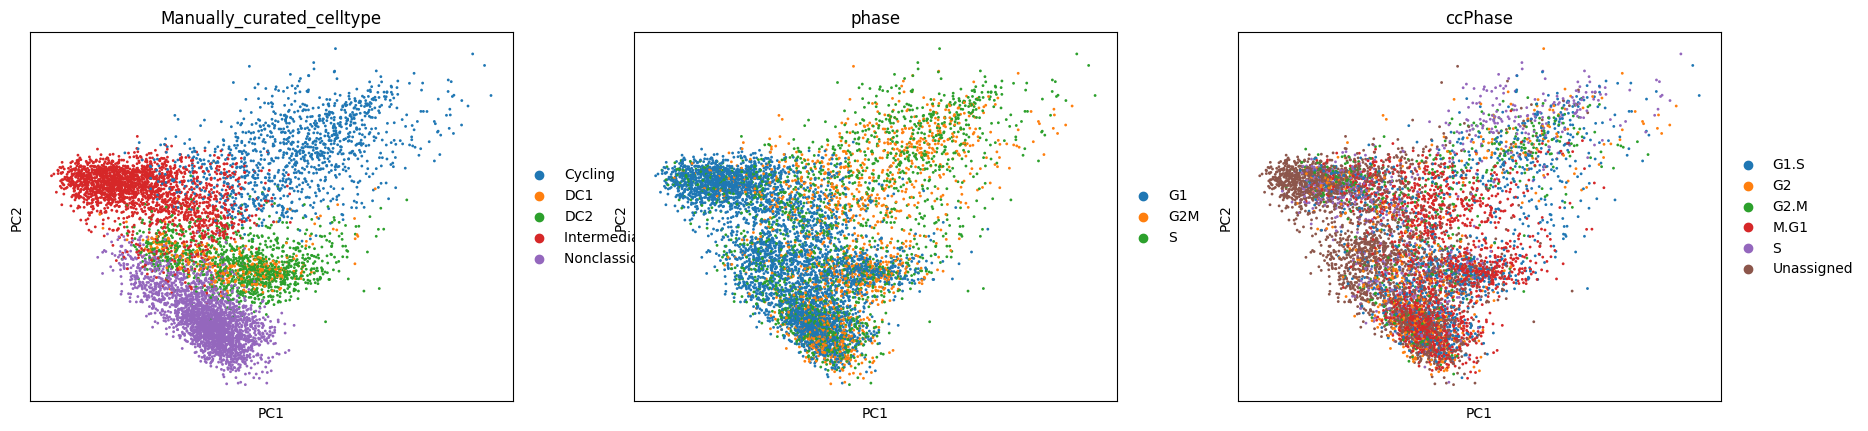

In [24]:
desired_obs = 'cell_cycle_theta'
sc.pl.pca(adata, color=desired_obs, save=f"_{dataset_name}_{desired_obs}.png")

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


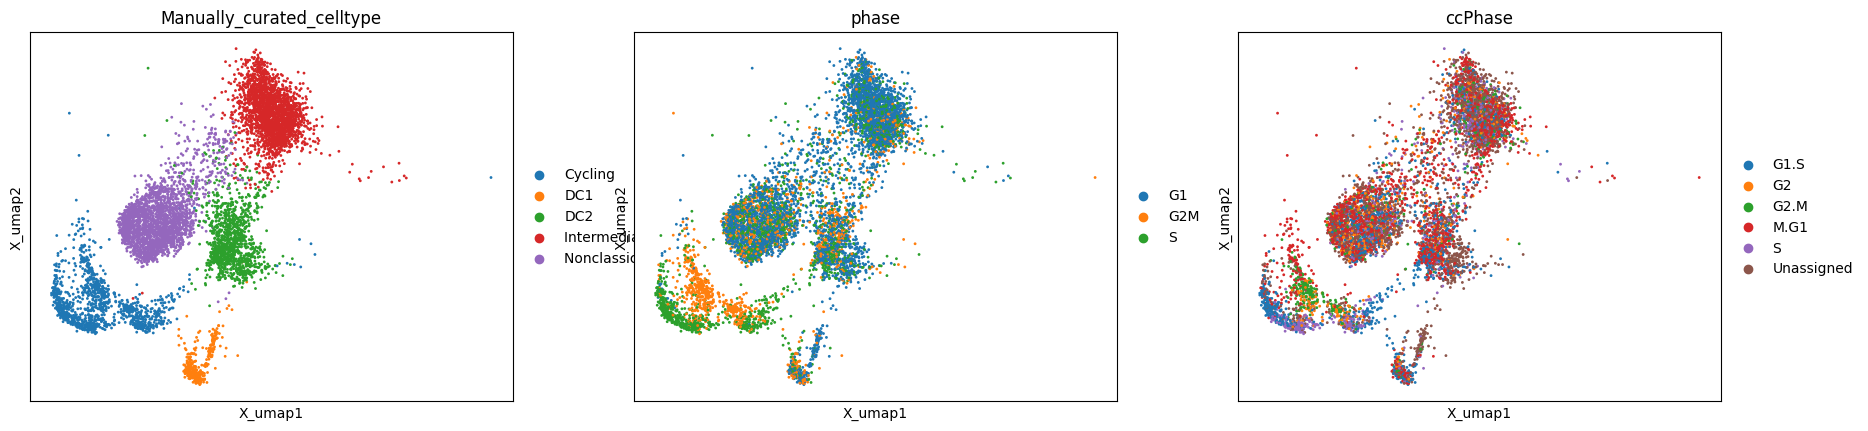

In [19]:
sc.pl.embedding(adata, color=['Manually_curated_celltype','phase','ccPhase'], basis='X_umap', save=f"_{dataset_name}_subset.png")

In [25]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)

In [26]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


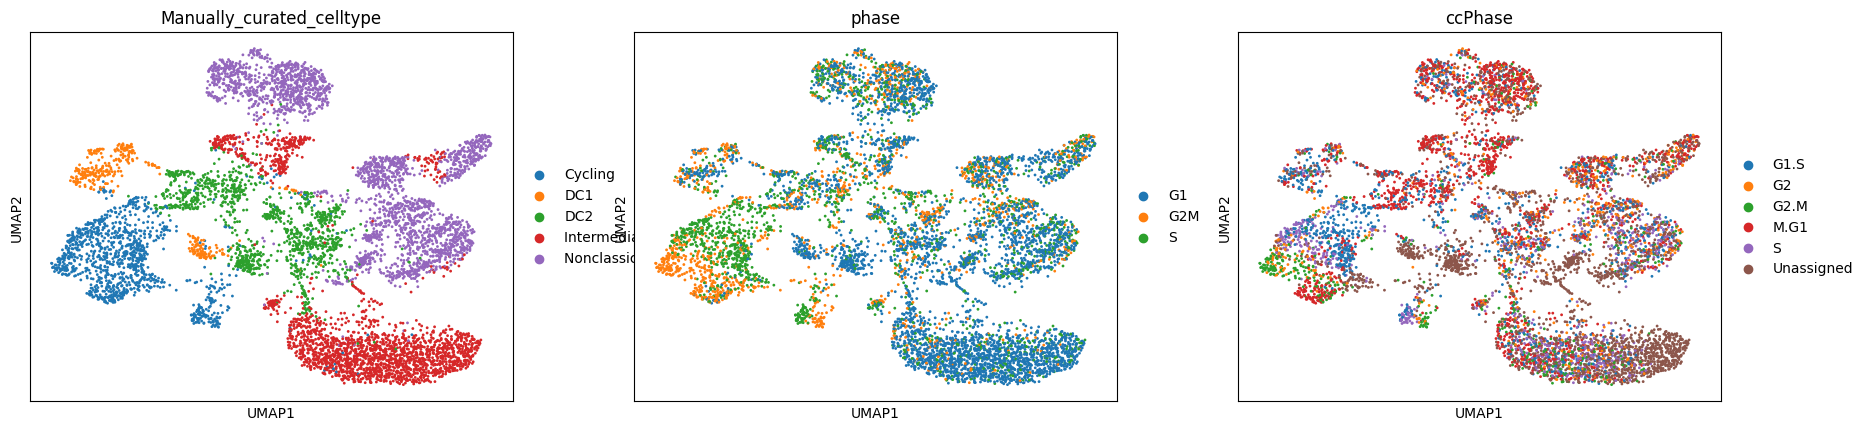

In [27]:
desired_obs = 'cell_cycle_theta'
sc.pl.umap(adata, color=[desired_obs], save=f"_{dataset_name}_{desired_obs}.png")

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.louvain(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


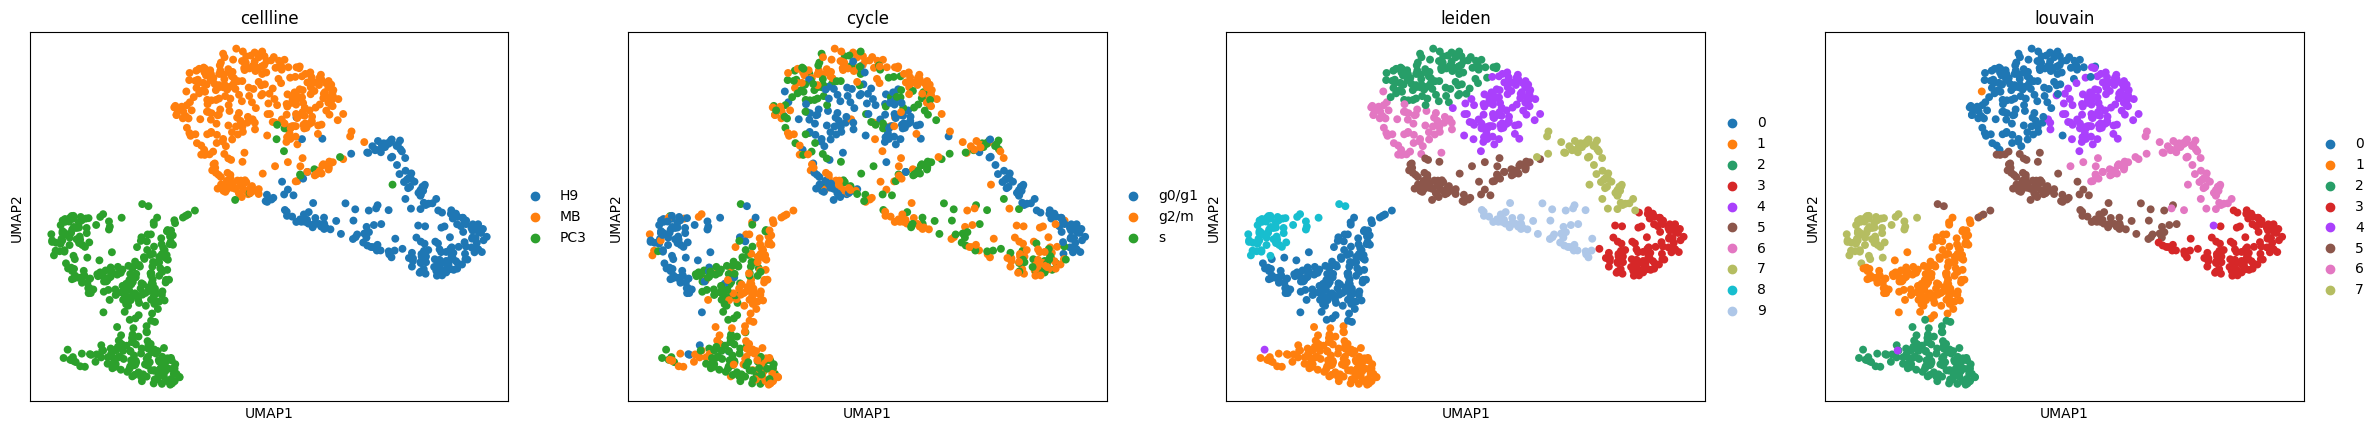

In [ ]:
desired_obs = ['Phase', 'cluster_label']
# desired_obs = desired_obs + ['leiden', 'louvain']
sc.pl.umap(adata, color=desired_obs, save=f"_{dataset}_computed.png")

In [ ]:
adata

AnnData object with n_obs × n_vars = 5367 × 10789
    obs: 'Clusters', '_X', '_Y', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'leiden', 'cell_cycle_theta'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'gene_count_corr'
    uns: 'ISMARA_activities', 'clusters_gradients_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_raw', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# Working with the embeddings from the VAE

In [12]:
# Make sure nput number and hyperparameter number is correct
input_number = 1
hyperparameter_number = 1

input_dir = "input_" + str(input_number)
input_path = os.path.join(figure_save_path, input_dir)
if not os.path.exists(input_path):
  print("Making " + input_path)
  os.mkdir(input_path)

hyperparameter_dir = "hyperparameter_" + str(hyperparameter_number)
hyperparameter_path = os.path.join(input_path, hyperparameter_dir)
if not os.path.exists(hyperparameter_path):
  print("Making " + hyperparameter_path)
  os.mkdir(hyperparameter_path)

print(input_path)
print(hyperparameter_path)

/content/scrna_mvae/figures/hela/input_1
/content/scrna_mvae/figures/hela/input_1/hyperparameter_1


In [22]:
# dataset_name = "velocity_human"
model_name = "s2, e10"

# Create a directory to hold the figures for the specific model
model_dir = "_".join(model_name.split(", "))
model_figure_save_path = os.path.join(hyperparameter_path, model_dir)
if not os.path.exists(model_figure_save_path):
  print("Making " + model_figure_save_path)
  os.mkdir(model_figure_save_path)

# Read in the text file with the lower-dimensional embeddings
embedding_name = f"{model_name}_all_encode_v63.txt"
embedding_path = os.path.join(save_path, input_dir)
embedding_path = os.path.join(embedding_path, hyperparameter_dir)
embedding_path = os.path.join(embedding_path, embedding_name)
# Read in the text file with the lower-dimensional embeddings
with open(embedding_path, 'r') as file:
    contents = file.read()

# Split the rows and convert them to floats
contents = contents.split("\n")[:-1]
if adata.X.shape[0] != len(contents):
  print("Error. contents should have the same number of rows as observations.", adata.X.shape, len(contents))

def float_list(l):
  new_l = []
  for x in l:
    new_l.append(float(x))
  return new_l

embeddings = [embedding.split(" ") for embedding in contents]
embeddings = [float_list(embedding) for embedding in embeddings]
embeddings = np.array(embeddings)
print(embeddings.shape)
adata.obsm["vae_embeddings"] = embeddings
adata.obsm["first_c"] = embeddings[:, 0: 3]
adata.obsm["second_c"] = embeddings[:, 3:]

(1477, 13)


In [23]:
adata

AnnData object with n_obs × n_vars = 1477 × 4545
    obs: 'barcode', 'batch', 'obs_names', 'ccPhase'
    var: 'gene_symbols', 'var_names'
    obsm: 'vae_embeddings', 'first_c', 'second_c'

# Visualization

In [24]:
import matplotlib.colors as mcolors

# Get the list of Tableau Colors
tableau_colors = list(mcolors.TABLEAU_COLORS.keys())

# Get the list of color names
color_names = tableau_colors + list(mcolors.CSS4_COLORS.keys())

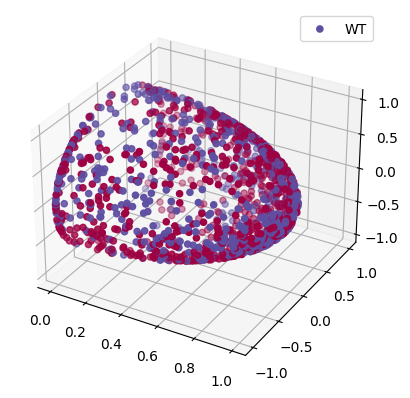

In [ ]:
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=adata.obs['batch'].rank(method='dense').astype(int), cmap='Spectral')
ax.legend(["WT", "Ago2KO"])

In [25]:
adata

AnnData object with n_obs × n_vars = 1477 × 4545
    obs: 'barcode', 'batch', 'obs_names', 'ccPhase'
    var: 'gene_symbols', 'var_names'
    obsm: 'vae_embeddings', 'first_c', 'second_c'

['Ago2KO' 'WT']


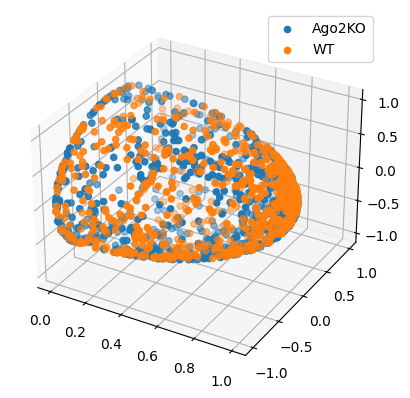

In [28]:
# For discrete observations
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'batch'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
use_axis = False
if use_axis:
  ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_xlim(-1.0, 1.0)
  ax.set_ylim(-1.0, 1.0)
  ax.set_zlim(-1.0, 1.0)
categories = np.unique(adata.obs[desired_obs])
print(categories)
for cat in categories:
  if cat != 'Unassigned':
    cat_indices = adata.obs[desired_obs] == cat
    x_cat = x[cat_indices]
    y_cat = y[cat_indices]
    z_cat = z[cat_indices]

    ax.scatter(x_cat, y_cat, z_cat, label=cat)
ax.legend()

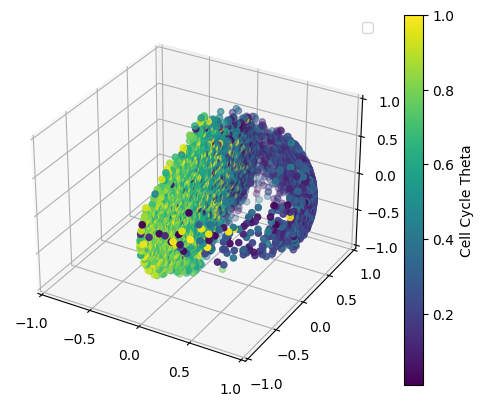

In [ ]:
# For continuous observations
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'cell_cycle_theta'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
use_axis = True
if use_axis:
  ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_xlim(-1.0, 1.0)
  ax.set_ylim(-1.0, 1.0)
  ax.set_zlim(-1.0, 1.0)

scatter = ax.scatter(x, y, z, c=adata.obs[desired_obs], cmap=plt.cm.viridis)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cell Cycle Theta')
ax.legend()

['G1.S' 'G2' 'G2.M' 'M.G1' 'S' 'Unassigned']


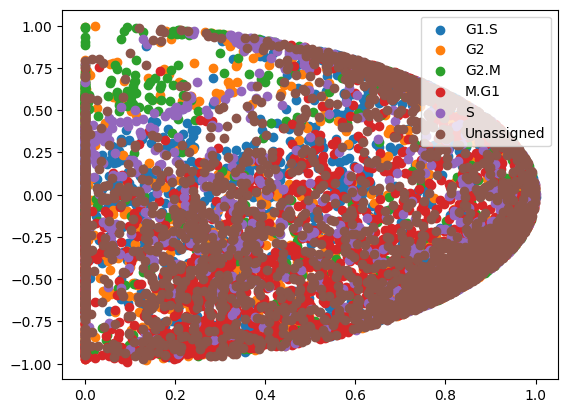

In [35]:

x = embeddings[:, 0]
y = embeddings[: , 1]

desired_obs = 'ccPhase'

fig = plt.figure()
ax = fig.add_subplot(111)
categories = np.unique(adata.obs[desired_obs])
print(categories)
for cat in categories:
  cat_indices = adata.obs[desired_obs] == cat
  x_cat = x[cat_indices]
  y_cat = y[cat_indices]

  ax.scatter(x_cat, y_cat, label=cat)
ax.legend()

In [29]:
if use_axis:
  additional = "_axis"
else:
  additional = ""
image_name = f"{model_name}_first_s2_{desired_obs}{additional}.png"
fig.savefig(os.path.join(model_figure_save_path, image_name))

In [ ]:
print(hyperparameter_path)

/content/scrna_mvae/figures/DataSetS2/input_1/hyperparameter_1


In [ ]:
plt.scatter(embeddings)

TypeError: ignored

In [21]:
# For discrete observations
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'batch'

categories = np.unique(adata.obs[desired_obs])
if len(categories) % 3 == 0:
  n_rows = len(categories) // 3
else:
  n_rows = len(categories) // 3 + 1
n_cols = 3

fig = plt.figure()
position = 1
for cat in categories:
  ax = fig.add_subplot(n_rows, n_cols, position, projection='3d')
  use_axis = False
  if use_axis:
    ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)

  cat_indices = adata.obs[desired_obs] == cat
  x_cat = x[cat_indices]
  y_cat = y[cat_indices]
  z_cat = z[cat_indices]

  ax.scatter(x_cat, y_cat, z_cat, label=cat, color=color_names[position-1])
  ax.legend()

  if use_axis:
    additional = "_axis"
  else:
    additional = ""
  image_name = f"{model_name}_first_s2_{desired_obs}_individual{additional}.png"
  fig.savefig(os.path.join(model_figure_save_path, image_name))

  position = position + 1

NameError: ignored

['G1' 'G2M' 'S']
['G1' 'G2M' 'S']
['G1' 'G2M' 'S']
['G1' 'G2M' 'S']
['G1' 'G2M' 'S']


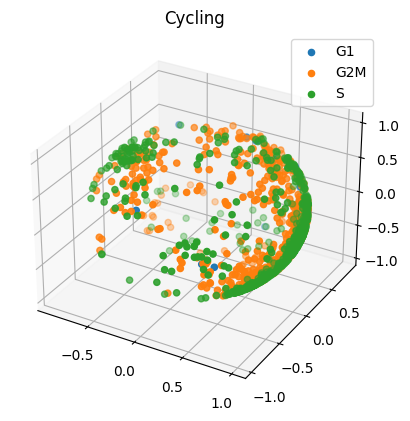

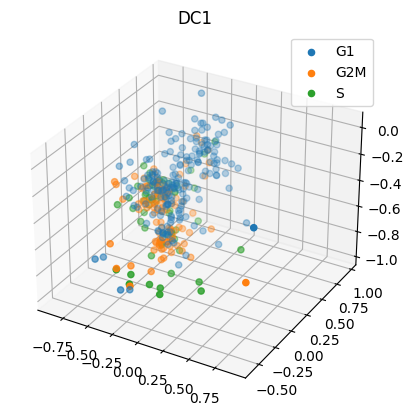

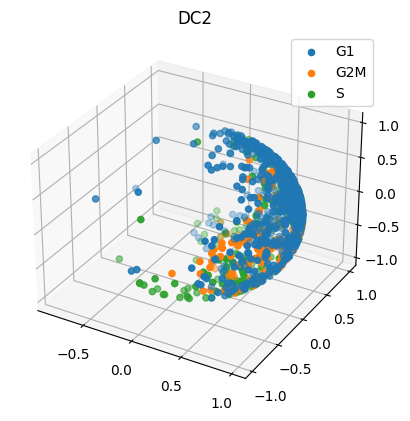

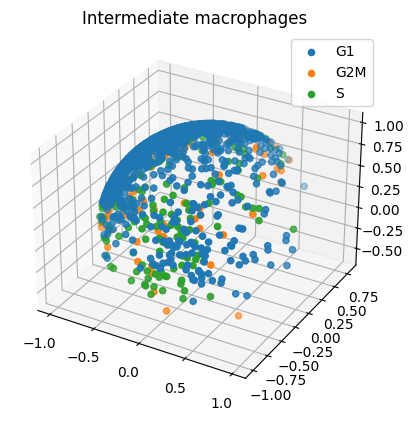

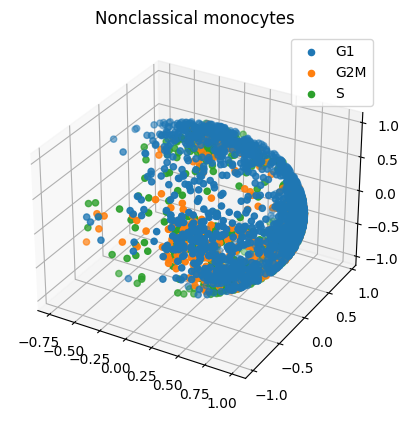

In [47]:
# For discrete observations
x = embeddings[:, 3]
y = embeddings[:, 4]
z = embeddings[:, 5]

first_obs = 'Manually_curated_celltype'
second_obs = 'phase'
for each_type in np.unique(adata.obs[first_obs]):
  chosen_subtype = each_type
  each_type_indices = adata.obs[first_obs] == chosen_subtype
  x_chosen = x[each_type_indices]
  y_chosen = y[each_type_indices]
  z_chosen = z[each_type_indices]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  use_axis = False
  if use_axis:
    ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)

  categories = np.unique(adata.obs[second_obs])
  print(categories)
  for cat in categories:
    cat_indices = adata[each_type_indices].obs[second_obs] == cat
    x_cat = x_chosen[cat_indices]
    y_cat = y_chosen[cat_indices]
    z_cat = z_chosen[cat_indices]

    ax.scatter(x_cat, y_cat, z_cat, label=cat)
    ax.set_title(each_type)
    ax.legend()
    image_name = f"{model_name}_second_s2_{each_type}_{second_obs}.png"
    # fig.savefig(os.path.join(model_figure_save_path, image_name))

['G1' 'G2M' 'S']


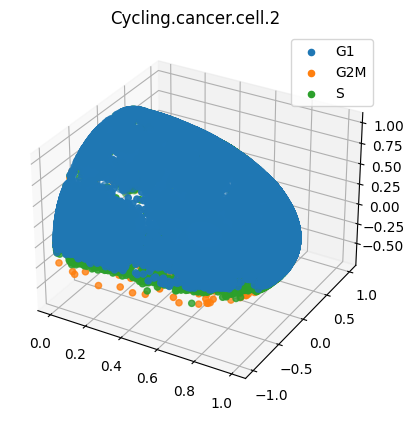

In [72]:
# For discrete observations
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'Phase'

each_type_indices = (adata.obs['cluster_label'] == 'Cancer.cell.1') | (adata.obs['cluster_label'] == 'Cancer.cell.6')
x_chosen = x[each_type_indices]
y_chosen = y[each_type_indices]
z_chosen = z[each_type_indices]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
use_axis = False
if use_axis:
  ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_xlim(-1.0, 1.0)
  ax.set_ylim(-1.0, 1.0)
  ax.set_zlim(-1.0, 1.0)

categories = np.unique(adata.obs[desired_obs])
print(categories)
for cat in categories:
  cat_indices = adata[each_type_indices].obs[desired_obs] == cat
  x_cat = x_chosen[cat_indices]
  y_cat = y_chosen[cat_indices]
  z_cat = z_chosen[cat_indices]

  ax.scatter(x_cat, y_cat, z_cat, label=cat)
  ax.set_title(each_type)
  ax.legend()

# image_name = f"{model_name}_first_s2_{each_type}_{desired_obs}.png"
# fig.savefig(os.path.join(model_figure_save_path, image_name))

In [51]:
# adata.obsm['X_umap_original']=adata.obsm['X_umap']

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


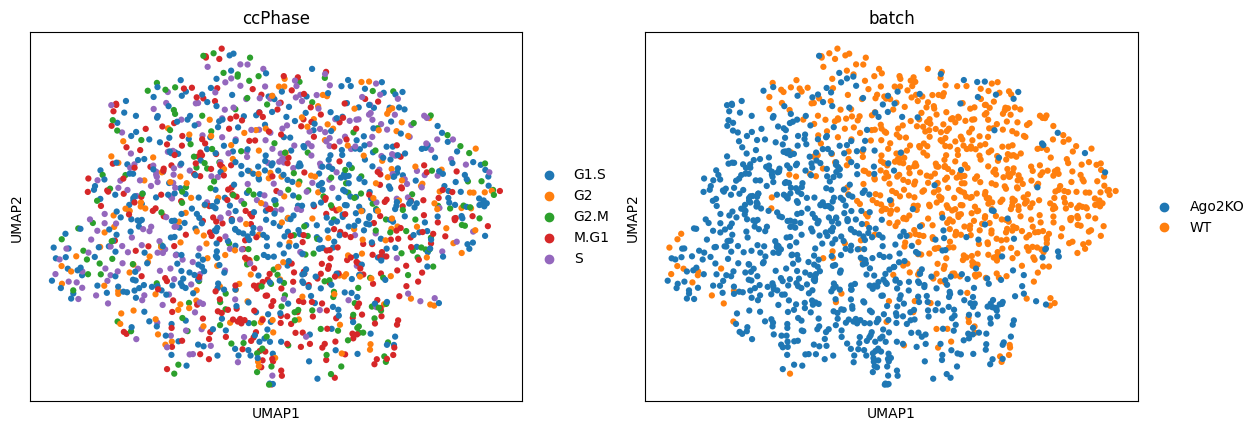

In [45]:
compute_umap(adata,
             l_neighbors=5,
             color=['ccPhase', 'batch'],
             component="first",
             n_pcs=None,
             embeddings_key="second_c",
             use_original_umap=False,
             save_figure=False)

In [32]:
compute_umap(adata,
             l_neighbors=10,
             color=['Phase', 'cluster_label'],
             component="first",
             n_pcs=None,
             embeddings_key="second_c",
             use_original_umap=False,
             save_figure=False)

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7fbd5be1d750>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


KeyboardInterrupt: ignored

# Downstream clustering analysis

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


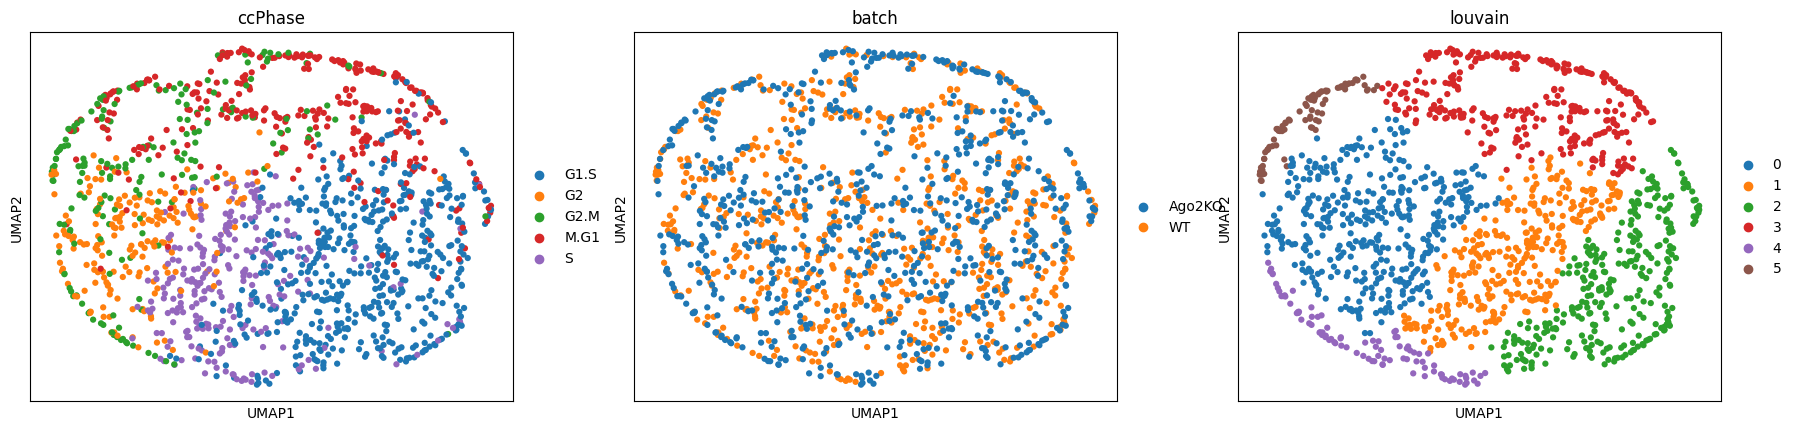

In [68]:
# Leiden clustering
clustering_type = "louvain"
if dataset_name == "hela":
  community_clustering(adata, clustering_type,
                       20,
                       0.3,
                       n_pcs=None, embeddings_key="first_c",
                       use_original_umap=False, save_figure=True)
elif dataset_name == "DataSetS2":
  community_clustering(adata, clustering_type,
                       10, 0.6,
                       n_pcs=None, embeddings_key="second_c",
                       use_original_umap=False, save_figure=False)
elif dataset_name == "myeloid":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=True)
elif dataset_name == "t-cells":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=False)
elif dataset_name == "b-cells":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=False)
else:
  raise NotImplementedError

In [31]:
def compute_umap(adata,
                         l_neighbors,
                         color,
                         component,
                         n_pcs=None, embeddings_key="vae_embeddings",
                         use_original_umap=True, save_figure=False):
  """
  Clustering.
  l_neighbors: The number of neighbors to use when creating the neighborhood map.
  n_pcs: Dimension to use when computing neighborhood map.
  color: A list of colors to display the UMAP in.
  component: A string that indicates which component of the model it is such as first or second.

  If save_figure=True, saves to a directory called figures with the following
  information in the image name
  data name,
  model
  dimension of embeddings
  dimension used to compute neighbors map,
  number of neighbors
  original if use_original_umap is True and computed otherwise
  """
  if n_pcs is None:
    n_pcs = adata.obsm[embeddings_key].shape[1]
  sc.pp.neighbors(adata, n_neighbors=l_neighbors, n_pcs=n_pcs, use_rep=embeddings_key)
  # bbknn.bbknn(adata, batch_key="Donor", neighbors_within_batch=l_neighbors)

  # Warning, the umap in X.obsm["umap"] is overwritten with the original umap when
  # set to True
  # Otherwise, X.obsm["umap"] is overwritten with the new umap
  if use_original_umap:
    adata.obsm["X_umap"] = adata.obsm["X_umap_original"]
  else:
    sc.tl.umap(adata)

  save=None
  if save_figure:
    information = [dataset_name,
                   model_name,
                   str(n_pcs),
                   embeddings_key,
                   str(l_neighbors),
                   "original" if use_original_umap else "computed"
                   ]
    save = "_" + "_".join(information) + ".png"
  sc.pl.umap(adata, color=color, save=save)

In [48]:
# Leiden or Louvain clustering
def community_clustering(adata, clustering_type,
                         l_neighbors, l_resolution,
                         n_pcs=None, embeddings_key="vae_embeddings",
                         use_original_umap=True, save_figure=False):
  """
  Clustering.
  l_neighbors: The number of neighbors to use when creating the neighborhood map.
  l_resolution: Controls coarseness of clustering. Higher values means more clusters.
  n_pcs: Dimension to use when computing neighborhood map.

  If save_figure=True, saves to a directory called figures with the following
  information in the image name
  data name (myeloid, t-cells or b-cells),
  distribution
  dimension of embeddings
  clustering method,
  dimension used to compute neighbors map,
  number of neighbors
  resolution starting with an r, for example r0_6 is r0.6
  original if use_original_umap is True and computed otherwise
  """
  if n_pcs is None:
    n_pcs = adata.obsm[embeddings_key].shape[1]
  sc.pp.neighbors(adata, n_neighbors=l_neighbors, n_pcs=n_pcs, use_rep=embeddings_key)
  # bbknn.bbknn(adata, batch_key="Donor", neighbors_within_batch=l_neighbors)
  if clustering_type == "leiden":
    sc.tl.leiden(adata, resolution=l_resolution)
  else:
    sc.tl.louvain(adata, resolution=l_resolution)

  # Warning, the umap in X.obsm["umap"] is overwritten with the original umap when
  # set to True
  # Otherwise, X.obsm["umap"] is overwritten with the new umap
  if use_original_umap:
    adata.obsm["X_umap"] = adata.obsm["X_umap_original"]
  else:
    sc.tl.umap(adata)

  save=None
  if save_figure:
    information = [dataset_name,
                   clustering_type,
                   str(n_pcs),
                   embeddings_key,
                   str(l_neighbors),
                   "r" + "_".join(str(l_resolution).split(".")),
                   "original" if use_original_umap else "computed"
                   ]
    save = "_" + "_".join(information) + ".png"
  sc.pl.umap(adata, color=['ccPhase', 'batch', clustering_type], save=save)

# Reading in R data from paper

In [20]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318066 sha256=b7ca181fb453c00c5ad7e53c3805417740f46928feb6bff891c38fd7451d6f5e
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [1]:
import rpy2.robjects as robjects

# Load the RDS file
cell_info_rdata = robjects.r['readRDS']('/content/drive/MyDrive/mvae_research/datasets/cellInfo.rds')

# Convert the R object to a Python object
cell_info_rdf = robjects.conversion.rpy2py(cell_info_rdata)

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Assume you have a R DataFrame object called 'r_dataframe'

# Convert the R DataFrame to a pandas DataFrame
cell_info_df = pandas2ri.rpy2py_dataframe(cell_info_rdf)

# Access and work with the pandas DataFrame
print(cell_info_df.shape)

(1477, 22)


In [3]:
number_phase = {}
for i  in range(0, len(cell_info_rdf[5])):
  if cell_info_rdf[5][i] not in number_phase:
    number_phase[cell_info_rdf[5][i]] = str(cell_info_rdf[5].rx(i+1)).split("\n")[0].split(" ")[1]

In [13]:
cell_phases = []
for each_id in adata.obs['obs_names']:
  cell_phases.append(number_phase[cell_info_df.loc[each_id]['ccPhase']])

In [14]:
wt_phases = []
ago_phases = []
for each_id in adata.obs['obs_names']:

  if each_id.split("_")[0] == "WT":
    wt_phases.append(cell_info_df.loc[each_id]['ccPhase'])
  else:
    ago_phases.append(cell_info_df.loc[each_id]['ccPhase'])

In [ ]:
wt_phases

In [16]:
for i in range(0, 5):
  print(np.sum(np.array(wt_phases) == (i+1))/len(wt_phases))
  print(np.sum(np.array(ago_phases)==i+1)/len(ago_phases))

0.34820143884892085
0.35294117647058826
0.18129496402877698
0.16879795396419436
0.1251798561151079
0.1265984654731458
0.1366906474820144
0.1278772378516624
0.20863309352517986
0.2237851662404092


In [17]:
adata.obs['ccPhase'] = np.array(cell_phases)

In [18]:
cell_info_df

datasetID  batchID               cellID     nUMI   nGene  \
WT_CTTGTAGCGTCT              1        1      WT_CTTGTAGCGTCT  69992.0  9258.0   
WT_AATTTAAACTTG              1        1      WT_AATTTAAACTTG  61152.0  8480.0   
WT_GACAACCTCATC              1        1      WT_GACAACCTCATC  64340.0  9067.0   
WT_ACCATACACACG              1        1      WT_ACCATACACACG  64509.0  8794.0   
WT_TTTCAGGCAGAC              1        1      WT_TTTCAGGCAGAC  60750.0  8468.0   
...                        ...      ...                  ...      ...     ...   
Ago2KO_ACCCTCTCTTCG          1        2  Ago2KO_ACCCTCTCTTCG   2398.0  1263.0   
Ago2KO_AAGCATTTAAGT          1        2  Ago2KO_AAGCATTTAAGT   2366.0  1356.0   
Ago2KO_TGCGTCTAGGTG          1        2  Ago2KO_TGCGTCTAGGTG   2366.0  1401.0   
Ago2KO_GAACACTTAAAN          1        2  Ago2KO_GAACACTTAAAN   1786.0  1235.0   
Ago2KO_GCCTAACAATCN          1        2  Ago2KO_GCCTAACAATCN   1922.0  1218.0   

                     ccPhase  meanOfPhaseScore  sdOfPhaseScore  \
WT_CTTGTAGCGTCT            3          0.839807        0.164922   
WT_AATTTAAACTTG            3          0.823897        0.300220   
WT_GACAACCTCATC            2          0.792590        0.105933   
WT_ACCATACACACG            2          0.812380        0.166171   
WT_TTTCAGGCAGAC            1          0.750271        0.104091   
...                      ...               ...             ...   
Ago2KO_ACCCTCTCTTCG        4          0.448854        0.244173   
Ago2KO_AAGCATTTAAGT        3          0.452088        0.186871   
Ago2KO_TGCGTCTAGGTG        1          0.581197        0.150326   
Ago2KO_GAACACTTAAAN        2          0.599961        0.256379   
Ago2KO_GCCTAACAATCN        4          0.606649        0.189368   

                     highestPhaseScore  secondHighestPhaseScore  ...  \
WT_CTTGTAGCGTCT               1.562848                 0.043129  ...   
WT_AATTTAAACTTG               0.839078                 0.567795  ...   
WT_GACAACCTCATC               1.116656                 1.043807  ...   
WT_ACCATACACACG               1.531466                 0.321670  ...   
WT_TTTCAGGCAGAC               1.112661                 1.029624  ...   
...                                ...                      ...  ...   
Ago2KO_ACCCTCTCTTCG           1.582362                 0.298585  ...   
Ago2KO_AAGCATTTAAGT           1.607494                 0.258965  ...   
Ago2KO_TGCGTCTAGGTG           1.220573                 0.855944  ...   
Ago2KO_GAACACTTAAAN           1.204970                 0.403889  ...   
Ago2KO_GCCTAACAATCN           1.005849                 1.005445  ...   

                           G2      G2.M      M.G1  G1.S_zScore  S_zScore  \
WT_CTTGTAGCGTCT      0.909788  0.920057  1.033136    -0.360485 -0.052627   
WT_AATTTAAACTTG      0.973003  1.003933  1.119779    -1.597609 -0.353527   
WT_GACAACCTCATC      0.726336  0.692273  0.964066     1.043807  1.116656   
WT_ACCATACACACG      0.816240  0.819492  1.067900    -0.651277  1.531466   
WT_TTTCAGGCAGAC      0.703728  0.655337  0.926849     1.112661  1.029624   
...                       ...       ...       ...          ...       ...   
Ago2KO_ACCCTCTCTTCG  0.334904  0.649169  0.761425    -0.834169 -0.809105   
Ago2KO_AAGCATTTAAGT  0.395812  0.418694  0.768517    -0.468501 -0.423060   
Ago2KO_TGCGTCTAGGTG  0.427712  0.456060  0.781964     1.220573  0.855944   
Ago2KO_GAACACTTAAAN  0.506165  0.676395  0.887230    -1.480814  1.204970   
Ago2KO_GCCTAACAATCN  0.651173  0.823528  0.721373    -0.338982 -0.354427   

                     G2_zScore  G2.M_zScore  M.G1_zScore  \
WT_CTTGTAGCGTCT       1.562848     0.043129    -1.192865   
WT_AATTTAAACTTG       0.839078     0.567795     0.544262   
WT_GACAACCTCATC      -0.524066    -0.976318    -0.660080   
WT_ACCATACACACG      -0.151070    -1.050789     0.321670   
WT_TTTCAGGCAGAC      -0.404171    -0.987348    -0.750766   
...                        ...          ...          ...   
Ago2KO_ACCCTCTCTTCG   0.298585     1.582362    -0.237672 

In [ ]:
str(cell_info_rdf[5].rx(1)).split("\n")[0].split(" ")[1]

'G2'

In [ ]:
cell_info_rdf[5]

<rpy2.robjects.vectors.FactorVector object at 0x7fae10228d40> [RTYPES.INTSXP]
R classes: ('factor',)
[G2, G2, S, S, ..., G2, G1.S, S, G2.M]

In [19]:
adata

AnnData object with n_obs × n_vars = 1477 × 4545
    obs: 'barcode', 'batch', 'obs_names', 'ccPhase'
    var: 'gene_symbols', 'var_names'

In [ ]:
for cat in adata.obs['cellline'].cat.categories:
  print(cat)
  for phase in adata.obs['cycle'].cat.categories:
    print(f"Percentage of {phase}: {np.sum(adata[adata.obs['cellline']==cat].obs['cycle']==phase)/np.sum(adata.obs['cellline']==cat)}")

H9
Percentage of g0/g1: 0.2907488986784141
Percentage of g2/m: 0.40969162995594716
Percentage of s: 0.29955947136563876
MB
Percentage of g0/g1: 0.35964912280701755
Percentage of g2/m: 0.3391812865497076
Percentage of s: 0.30116959064327486
PC3
Percentage of g0/g1: 0.23545706371191136
Percentage of g2/m: 0.3739612188365651
Percentage of s: 0.39058171745152354


# Choosing a subset of the cells

In [ ]:
def obtain_subset_indices(adata, obs_key, desired_types):
  subset_indices = adata.obs[obs_key] == desired_types[0]
  for i in range(1, len(desired_types)):
    subset_indices = subset_indices | (adata.obs[obs_key] == desired_types[i])
  return subset_indices

In [ ]:
# def obtain_subset(adata, obs_key, desired_types):
  # subset = adata.X[adata.obs[obs_key] == desired_types[0]]

  # for i in range(1, len(desired_types)):
    # next_subset = adata.X[adata.obs[obs_key] == desired_types[i]]
    # subset = np.vstack((subset.todense(), next_subset.todense()))
  # return subset

In [ ]:
subset_indices = obtain_subset_indices(adata, 'cluster_label', ['Cycling.cancer.cell.2',
                                                      'Cycling.cancer.cell.1',
                                                      'Cancer.cell.1',
                                                      'Cancer.cell.6',
                                                      ])

In [ ]:
adata = adata[subset_indices]